In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline


In [2]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

In [3]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
print(cancer['data'])

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [5]:
df=pd.DataFrame(data=cancer['data'],columns=cancer['feature_names'])

In [6]:
df.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [7]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df)
scaled_data=scaler.transform(df)

In [8]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(scaled_data)
x_pca=pca.transform(scaled_data)
print(scaled_data.shape)
print(x_pca.shape)
# access values and vectors
#print(pca.components_)
print(pca.explained_variance_)#gives top two eigen values
# transform data
cov_mat = np.cov(scaled_data.T) 
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
per=(sum(pca.explained_variance_)/sum(eig_vals))*100
print(per)
#https://towardsdatascience.com/a-complete-guide-to-principal-component-analysis-pca-in-machine-learning-664f34fc3e5a

(569, 30)
(569, 2)
[13.30499079  5.7013746 ]
63.243207651559366


In [9]:
X=np.matrix(scaled_data)
sigma=(1/569)*X.T*X# % compute the covariance matrix

In [10]:
U, s, V = np.linalg.svd(sigma)# compute our projected directions
ureduce=U[:,0:2]#take the first k directions
ureduce.shape#30*2
X.shape#569*30
z=X*ureduce# compute the projected data points
z.shape#569*2
x_approx=z*ureduce.T
x_approx.shape#569*30 #Reconstruction from Compressed Representation


(569, 30)

In [11]:
d=X-x_approx
e=np.multiply(d,d)
f=np.multiply(scaled_data,scaled_data)
p=(1-(e.sum()/f.sum()))*100
print('percent==',p)

percent== 63.243207651559445


In [12]:
# access values and vectors
#print(pca.components_)
print(pca.explained_variance_)
# transform data
cov_mat = np.cov(scaled_data.T) 
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
per=(sum(pca.explained_variance_)/sum(eig_vals))*100
print(per)

[13.30499079  5.7013746 ]
63.243207651559366


In [13]:
a=np.matrix([[1,2,3],[4,5,6]])
a.sum()/8

2.625

Text(0, 0.5, 'Second pricipal component')

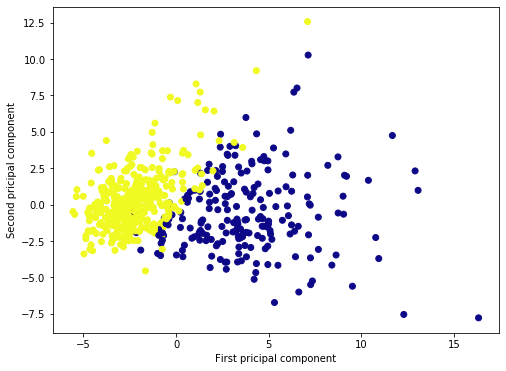

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='plasma')
plt.xlabel('First pricipal component')
plt.ylabel('Second pricipal component')

In [15]:
C=pca.components_

In [16]:
df_comp=pd.DataFrame(pca.components_,columns=cancer['feature_names'])
df_comp.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


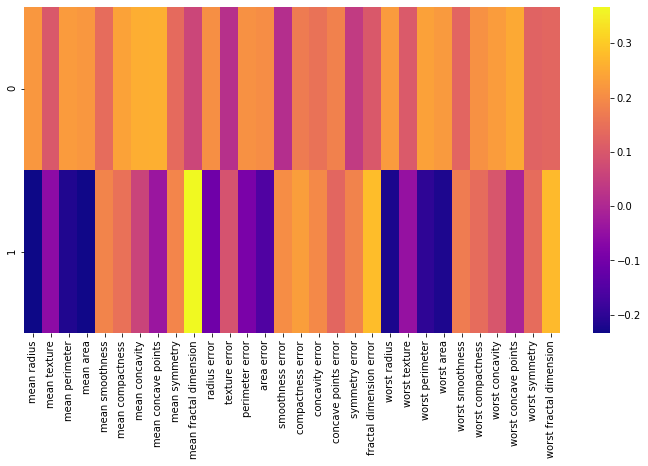

In [17]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma')

In [18]:
from numpy import cov
from numpy.linalg import eig

In [19]:
print(C)
# calculate covariance matrix of centered matrix
V = cov(C.T)
print(V)
# eigendecomposition of covariance matrix
values, vectors = eig(V)
print(vectors)
print(values)
# project data
P = vectors.T.dot(C.T)
print(P.T)

[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]
[[ 0.10249562  0.0369974   0.10022256  0.10233989 -0.0098528   0.01978418
   0.04487642  0.06692268 -0.01181291 -0.06841472  0.07052431 -0.01642423
   0.06809123  0.08040156 -0.0429893  -0.01410854 -0.00987412  0.01201982
  -0.03199869 -0.04018778  0.1013871

In [20]:
help(pca.explained_variance_)

Help on ndarray object:

class ndarray(builtins.object)
 |  ndarray(shape, dtype=float, buffer=None, offset=0,
 |          strides=None, order=None)
 |  
 |  An array object represents a multidimensional, homogeneous array
 |  of fixed-size items.  An associated data-type object describes the
 |  format of each element in the array (its byte-order, how many bytes it
 |  occupies in memory, whether it is an integer, a floating point number,
 |  or something else, etc.)
 |  
 |  Arrays should be constructed using `array`, `zeros` or `empty` (refer
 |  to the See Also section below).  The parameters given here refer to
 |  a low-level method (`ndarray(...)`) for instantiating an array.
 |  
 |  For more information, refer to the `numpy` module and examine the
 |  methods and attributes of an array.
 |  
 |  Parameters
 |  ----------
 |  (for the __new__ method; see Notes below)
 |  
 |  shape : tuple of ints
 |      Shape of created array.
 |  dtype : data-type, optional
 |      Any objec

In [21]:
cov_mat= np.cov(scaled_data, rowvar=False) 
cov_mat

array([[ 1.00176056e+00,  3.24351929e-01,  9.99612069e-01,
         9.89095475e-01,  1.70881506e-01,  5.07014640e-01,
         6.77955036e-01,  8.23976636e-01,  1.48001350e-01,
        -3.12179472e-01,  6.80285970e-01, -9.74887767e-02,
         6.75358538e-01,  7.37159198e-01, -2.22992026e-01,
         2.06362656e-01,  1.94545531e-01,  3.76831225e-01,
        -1.04504545e-01, -4.27163418e-02,  9.71245907e-01,
         2.97530545e-01,  9.66835698e-01,  9.42739295e-01,
         1.19826732e-01,  4.14190751e-01,  5.27839123e-01,
         7.45524434e-01,  1.64241985e-01,  7.07832563e-03],
       [ 3.24351929e-01,  1.00176056e+00,  3.30113223e-01,
         3.21650988e-01, -2.34296930e-02,  2.37118951e-01,
         3.02950254e-01,  2.93980713e-01,  7.15266864e-02,
        -7.65717560e-02,  2.76354360e-01,  3.87037830e-01,
         2.82169018e-01,  2.60302460e-01,  6.62542133e-03,
         1.92312595e-01,  1.43545353e-01,  1.64139495e-01,
         9.14323671e-03,  5.45533955e-02,  3.53193674e-

In [22]:
cov_mat = np.cov(scaled_data.T) 
eig_vals, eig_vecs = np.linalg.eig(cov_mat) 
print('Eigenvectors \n%s' %eig_vecs) 
print('\nEigenvalues \n%s' %eig_vals)


eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) 
for i in range(len(eig_vals))] 
print(type(eig_pairs))
eig_pairs.sort() 
eig_pairs.reverse() 
print("\n",eig_pairs) 
#Visually confirm that the list is correctly sorted by decreasing eigenvalues 
print('\n\n\nEigenvalues in descending order:') 
for i in eig_pairs: 
    print(i[0])

Eigenvectors 
[[ 2.18902444e-01 -2.33857132e-01 -8.53124284e-03  4.14089623e-02
  -3.77863538e-02  1.87407904e-02  1.24088340e-01  7.45229622e-03
  -2.23109764e-01  9.54864432e-02  4.14714866e-02  5.10674568e-02
   1.19672116e-02 -5.95061348e-02 -5.11187749e-02  1.50583883e-01
  -2.02924255e-01 -1.46712338e-01 -2.25384659e-01 -7.02414091e-01
   2.11460455e-01 -2.11194013e-01 -1.31526670e-01  1.29476396e-01
   1.92264989e-02 -1.82579441e-01  9.85526942e-02 -7.29289034e-02
  -4.96986642e-02  6.85700057e-02]
 [ 1.03724578e-01 -5.97060883e-02  6.45499033e-02 -6.03050001e-01
   4.94688505e-02 -3.21788366e-02 -1.13995382e-02 -1.30674825e-01
   1.12699390e-01  2.40934066e-01 -3.02243402e-01  2.54896423e-01
   2.03461333e-01  2.15600995e-02 -1.07922421e-01  1.57841960e-01
   3.87061187e-02  4.11029851e-02 -2.97886446e-02 -2.73661018e-04
  -1.05339342e-02  6.58114593e-05 -1.73573093e-02  2.45566636e-02
  -8.47459309e-02  9.87867898e-02  5.54997454e-04 -9.48006326e-02
  -2.44134993e-01 -4.483694

In [24]:
tot = sum(eig_vals) 
print("\n",tot) 
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
print("\n\n1. Variance Explained\n",var_exp) 
cum_var_exp = np.cumsum(var_exp) 
print("\n\n2. Cumulative Variance Explained\n",cum_var_exp) 
print("\n\n3. Percentage of variance the first two principal components each contain\n ",var_exp[0:2]) 
print("\n\n4. Percentage of variance the first two principal components together contain\n",sum(var_exp[0:2]))


 30.052816901408463


1. Variance Explained
 [44.272025607526345, 18.971182044033092, 9.393163257431397, 6.602134915470138, 5.495768492346265, 4.024522039883346, 2.2507337129825067, 1.588723800021324, 1.3896493745591065, 1.168978189413149, 0.9797189875980127, 0.8705379007378821, 0.8045249871967317, 0.5233657454926356, 0.3137832167627401, 0.2662093365152326, 0.19799679253242916, 0.1753959450226363, 0.1649253059225166, 0.10386467483387112, 0.09990964637002582, 0.09146467510543389, 0.08113612588991029, 0.06018335666716767, 0.051604237916518796, 0.027258799547749266, 0.023001546250595986, 0.0052977929038087405, 0.002496010324687328, 0.0004434827427365665]


2. Cumulative Variance Explained
 [ 44.27202561  63.24320765  72.63637091  79.23850582  84.73427432
  88.75879636  91.00953007  92.59825387  93.98790324  95.15688143
  96.13660042  97.00713832  97.81166331  98.33502905  98.64881227
  98.91502161  99.1130184   99.28841435  99.45333965  99.55720433
  99.65711397  99.74857865  99.82971477